In [ ]:
import pandas as pd 
import numpy as np

from keras import models 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import  train_test_split

In [301]:
training = pd.read_csv("Diabetes.csv")
training= pd.get_dummies(training, columns=['Gender'], prefix='',drop_first=False)
training.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,_F,_M
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,1,0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,0,1
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,1,0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,1,0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,0,1


In [302]:
#print(training.isnull().any())
data = training

In [303]:
x = data.iloc[:,data.columns!='CLASS'].values.astype('float32')
y = data.loc[:,"CLASS"].values

In [304]:
#0=N,2=Y,1=P
label = LabelEncoder()
scale = StandardScaler()
y=label.fit_transform(y).astype('int')
#scale everything besides encoded values _M & _F
x[:,:12] = scale.fit_transform(x[:,:12])

<h1>i.Loading the Necessary Model</h1>


In [305]:
#### spliting the train test data into 2 
x_train, x_val_and_test,y_train, y_val_and_test = train_test_split(x, y, test_size=0.2)
#splitting it yet again into RANDOM train and test subsets 
x_val,x_test,y_val,y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

In [306]:
network = load_model("diabetes_model.h5")
feedback = network.evaluate(x_test,y_test)
print("Loss(mse): ", feedback[0], "\nMean_absolute_error: ", feedback[1], "\n\nDifference in mean_absolute error and mean_squared_error: ", abs(feedback[0] - feedback[1]))

4/4 [==============================] - 0s 860us/step - loss: 0.0540 - mean_absolute_error: 0.1516
Loss(mse):  0.05401701107621193 
Mean_absolute_error:  0.15156134963035583 

Difference in mean_absolute error and mean_squared_error:  0.0975443385541439


In [307]:
predicted_target = network.predict(x_test)

<h1>ii.Calculating F1 score</h1>

<p>observing the prediction accuracy of our model by matching each predicted value with the actual one,
then finding the percentage of those correctly predicted: </p>
<p>1.TP=>Ones correctly predicted as 2 or 1 (positve with diabetes)</p>
<p>2.TN=>Ones correctly predicted as 0 (false predicted as false)</p>
<p>3.FP=>When negative cases of diabetes are predicted as positive , when 0 is predicted as 2 or 1 (false positives for diabetes)</p>
<p>4.FN=>The exect inverse of FP (and most severe) when 2 or 1 is predicted as 0.</p>

In [ ]:
correct=0
tp,tn,fp,fn=[0,0,0,0]
x_axis = []
for i in range(y_test.shape[0]):
    x_axis.append(i+1);
    if (np.round(predicted_target[i],0) == y_test[i]):
        correct = correct+1
        tp = tp+1 if (y_test[i] == 2 or y_test[i] == 1) else tp+0
        tn = tn+1 if (y_test[i] == 0) else tn+0
    else:
        fp = fp+1 if (y_test[i]==0) else fp+0
        fn = fn+1 if (np.round(predicted_target[i],0) == 0) else fn+0
accuracy = correct/y_test.shape[0]
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision =  tp/(tp+fp)
FPR = fp/(fp+tn)
FNR = fn/(fn+tp)
F1=2*(precision*sensitivity)/(precision+sensitivity)

In [309]:
y_test.shape

(100,)

In [310]:
print("These parameters should be closest as possible to 100%\n","\nModel Accuracy: \t",accuracy,"\nModel Sensitivity: \t", sensitivity, "\nModel Specificity: \t", specificity, "\nModel Precision: \t", precision) 

These parameters should be closest as possible to 100%
 
Model Accuracy: 	 0.93 
Model Sensitivity: 	 1.0 
Model Specificity: 	 0.7 
Model Precision: 	 0.9662921348314607


In [311]:
print("These parameters should be closest as possible to 0%\n","\nFalse-Positive Rate: \t",FPR,"\nFalse-Negative Rate: \t",FNR) 

These parameters should be closest as possible to 0%
 
False-Positive Rate: 	 0.3 
False-Negative Rate: 	 0.0


In [312]:
#The model can be reloaded and reused anytime at will 
#network = load_model("diabetes_model.h5")
#network.evaluate(x_test,y_test)
print("The calculated F1 score:\t",F1)

The calculated F1 score:	 0.9828571428571428


<h1>iii.Visualizing Prediction Accuracy</h1>

<p>Under ideal circumstances, the graph above should be entirely blue, but due to misspredictions, outlying instances of 'red' are
detected.These red outliers could mean one of three cases:</p>
<p>1.The model infered the patient was a "predicted diabetic", but it turns out 
 the patient was actually "diabetic" (these can be excused as good predictions, where 2 was predicted as 1).</p>
<p>2.The second being the patient was misdiagnosed entirely, with the model claiming the patient was diabetic, or potentially diabetic while in actual fact it wasn't the case(0 being predicted as either 1 or 2).</p>
<p>3.The third being that the patient was predicted as not having diabetes while in fact he/she did or did potentially (1 or 2 being predicted as 0, not so detrimental with 1).</p>

Text(0, 0.5, 'Ratings')

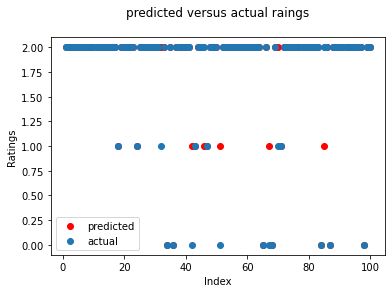

In [313]:

plt.scatter(x_axis,np.round(predicted_target,0).reshape(-1,),color='r',marker='o')
plt.scatter(x_axis,y_test,marker='o')
plt.title('predicted versus actual raings\n')
plt.xlabel('Index')
plt.legend(['predicted','actual'])
plt.ylabel('Ratings')
plt.save("plot.")

<p>1.Any red marker from the graph thats situated at rating '0' is bad (not so much if the corresponding blue is on 1, severe if on 2).

2.Any red marker on rating '2' can either be bad (but not as bad as condition .1) or good (a predict diabetic predicted as diabetic, 1 as 2).

3.Any outlying red on '2' is bad if a corresponding blue is on '0', otherwise its "tolerable", not very good, but "tolerable" (predict diabetic as diabetic).</p>